In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Criar os DataFrames para cada componente da Galáxia

ThinD = pd.read_csv('ThinDisc.txt', delim_whitespace=True)
ThickD = pd.read_csv("ThickDisc.txt", delim_whitespace=True)
Halo = pd.read_csv("Halo.txt", delim_whitespace=True)
Bulge = pd.read_csv("Bulge.txt", delim_whitespace=True)

C:\Users\kawda\AppData\Local\Temp\ipykernel_8508\1754725499.py:3: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  ThinD = pd.read_csv('ThinDisc.txt', delim_whitespace=True)


,#Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,U,B,V,R,I,J,H,K,Mact
0,1,7.55,0.19,1.72636,0.930,3.887,4.239,7.9,0.031,0.0,10.346,10.608,10.576,10.321,10.175,10.055,9.923,9.833,9.821,1.726
1,1,7.95,-0.25,1.72640,1.050,3.945,4.350,10.0,0.037,0.0,12.146,12.359,12.329,12.229,12.185,12.146,12.102,12.077,12.070,1.726
2,1,8.01,-0.03,0.57699,-1.188,3.616,4.797,7.8,0.031,0.0,15.539,18.717,17.654,16.414,15.589,14.883,13.981,13.296,13.178,0.577
3,1,8.31,0.11,0.62775,-1.081,3.624,4.759,9.6,0.037,0.0,17.073,20.218,19.133,17.909,17.105,16.424,15.534,14.835,14.728,0.628
4,1,8.33,0.01,0.55901,-1.240,3.609,4.808,9.2,0.036,0.0,17.070,20.345,19.269,18.014,17.167,16.416,15.489,14.808,14.684,0.559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,3,10.11,-1.27,0.69189,-0.354,3.758,4.610,11.3,0.038,0.0,16.956,17.614,17.730,17.132,16.749,16.387,15.933,15.567,15.520,0.692
963,3,10.11,-0.79,0.86795,1.222,3.696,2.885,14.8,0.038,0.0,16.514,18.072,17.706,16.817,16.313,15.857,15.219,14.696,14.634,0.868
964,3,10.11,-0.77,0.85023,0.385,3.776,4.032,12.3,0.038,0.0,16.107,16.690,16.772,16.232,15.883,15.558,15.151,14.823,14.791,0.850
965,3,10.11,-0.77,0.82106,0.153,3.785,4.287,12.9,0.038,0.0,17.287,17.808,17.919,17.406,17.072,16.760,16.377,16.067,16.038,0.821


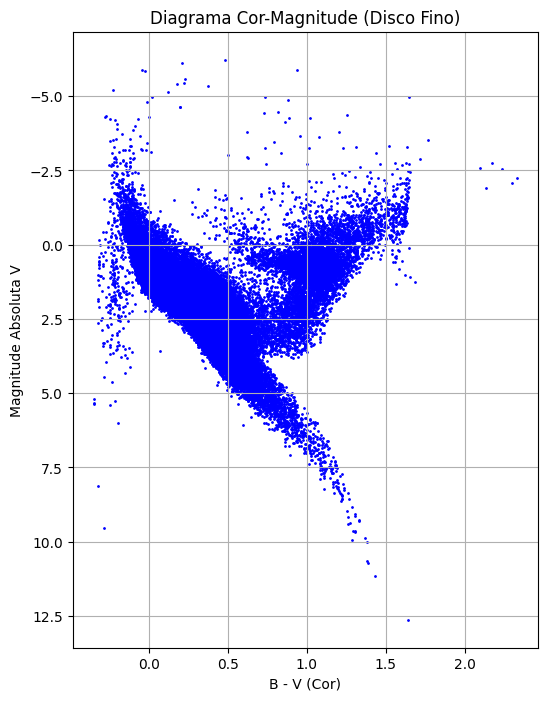

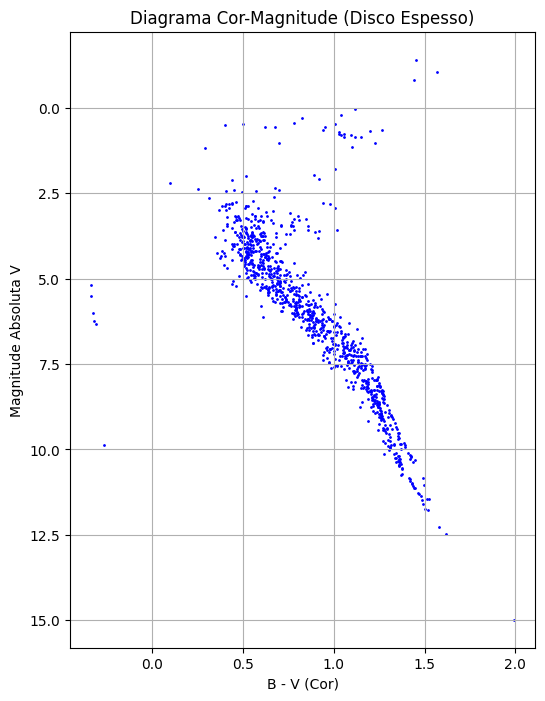

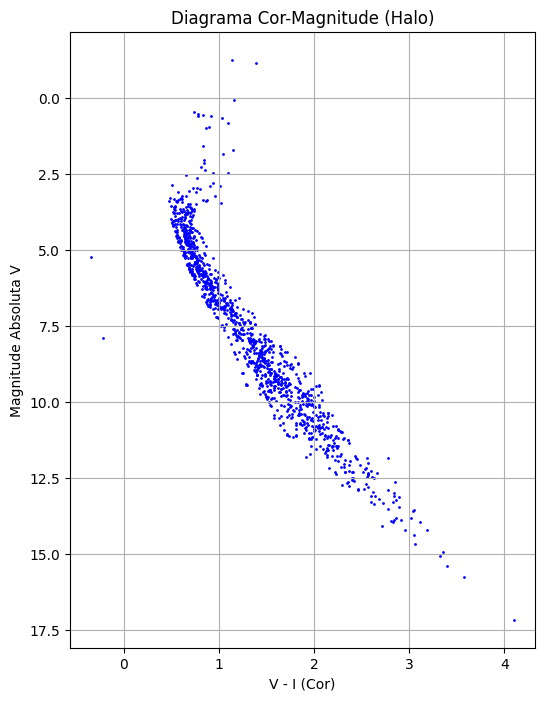

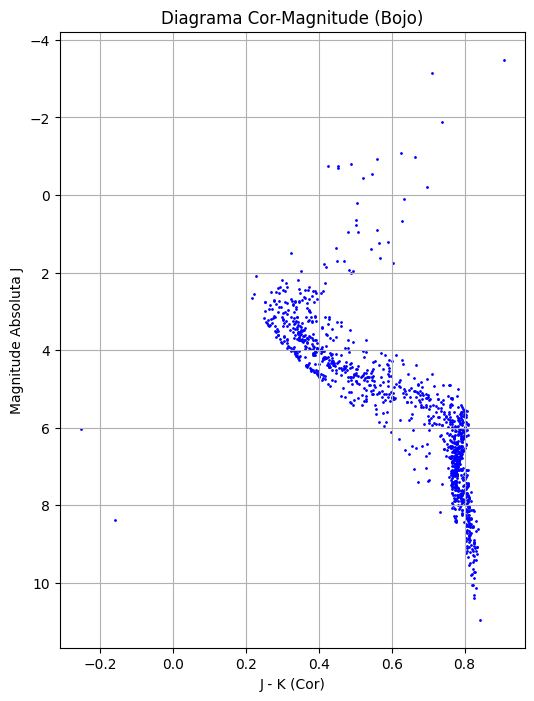

In [7]:
# Função para plotar o CMD de uma região
def plot_cmd(df, region_name, color, mag_apparent, mag_absolute):
    """
    Plota o diagrama cor-magnitude (CMD) de uma região da Galáxia.
    
    Recebe: DataFrame com os dados da região, nome da região(string), cores a serem usadas(list of strings), magnitude aparente(string) e magnitude absoluta(string).
    
    Calcula o intervalor de cores fornecido
    Converte a magnitude aparente para absoluta com a formula
    Plota o CMD invertendo o eixo y
    """
    # Calcular a cor usando os filtros mais adequados para cada região
    cor = df[color[0]] - df[color[1]]
    
    # Converter a magnitude aparente para absoluta
    M_abs = df[mag_apparent] - df['m-M0'] - df['Av']
    
    # Plotar o diagrama cor-magnitude
    plt.figure(figsize=(6, 8))
    plt.scatter(cor, M_abs, color='blue', s=1)
    plt.gca().invert_yaxis()  # Inverter o eixo y
    plt.xlabel(f'{color[0]} - {color[1]} (Cor)')
    plt.ylabel(f'Magnitude Absoluta {mag_absolute}')
    plt.title(f'Diagrama Cor-Magnitude ({region_name})')
    plt.grid(True)
    plt.show()

# Exemplo para o Disco Fino: Usar B-V
plot_cmd(ThinD, 'Disco Fino', color=['B', 'V'], mag_apparent='V', mag_absolute='V')

# Exemplo para o Disco Espesso: Usar B-V
plot_cmd(ThickD, 'Disco Espesso', color=['B', 'V'], mag_apparent='V', mag_absolute='V')

# Exemplo para o Halo: Usar V-I
plot_cmd(Halo, 'Halo', color=['V', 'I'], mag_apparent='V', mag_absolute='V')

# Exemplo para o Bojo: Usar J-K
plot_cmd(Bulge, 'Bojo', color=['J', 'K'], mag_apparent='J', mag_absolute='J')
